In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()

# build vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [4]:
# build the dataset
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random. shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev =build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182426, 3]) torch.Size([182426])
torch.Size([22779, 3]) torch.Size([22779])
torch.Size([22941, 3]) torch.Size([22941])


In [ ]:
g = torch. Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch. randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [6]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [9]:
for p in parameters:
    p.requires_grad = True

lre = torch.linspace(-3, 0, 50000)
lrs = 10**lre

lri = []
lossi = []
stepi = []


In [10]:
for i in range(50000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[50000 - i - 1]
    # lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.131467342376709


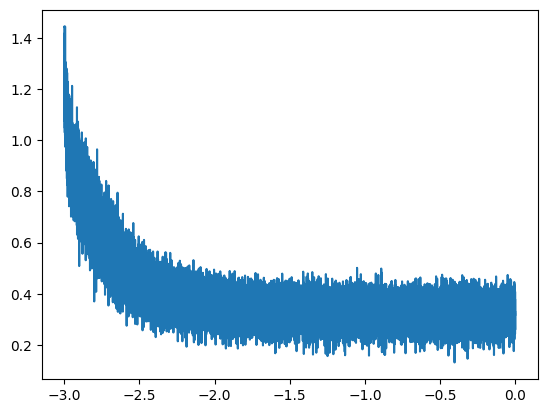

In [11]:
plt.plot(lri, lossi)

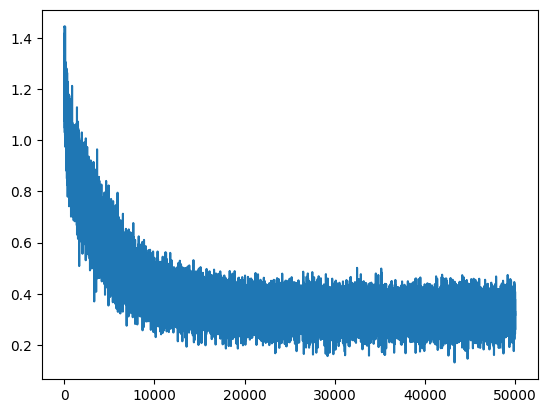

In [12]:
plt.plot(stepi, lossi)

In [13]:
# Loss on Validation Set

emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1812, grad_fn=<NllLossBackward0>)

In [14]:
# Loss on Test Set

emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1751, grad_fn=<NllLossBackward0>)

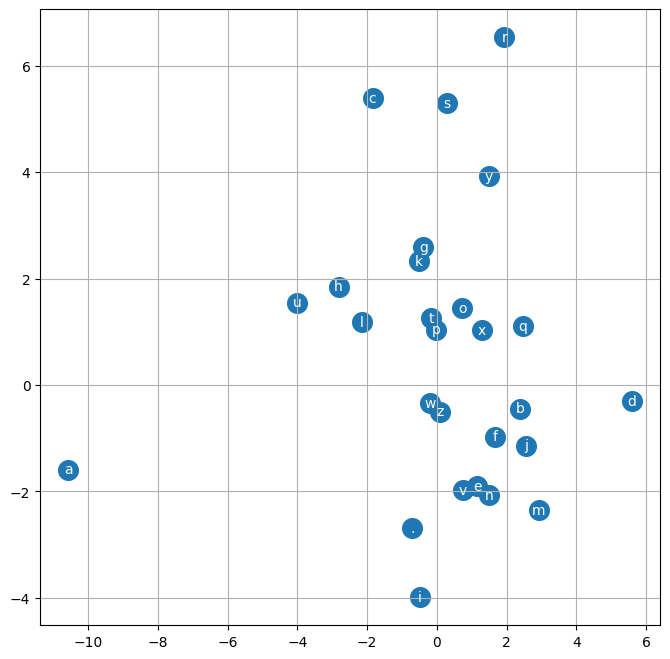

In [15]:
# Embedding Visualization

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [16]:
# sample from the model
g = torch. Generator().manual_seed(2147483647)

for _ in range(20):

    out = []
    context = [0] * 3
    while True:
        emb = C[torch. tensor( [context] )] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

junide.
janasia.
parlay.
adria.
jirhito.
cour.
ter.
kalinaa.
yanilena.
jadeyaine.
imolessin.
evy.
arterinvelyn.
yaretum.
maryn.
lena.
jaylie.
reaya.
jocahana.
brine.
